# 1. Introdução

Este notebook demonstra com simular uma mudança de plano e visão em perspectiva utilizando operações homográficas.

In [1]:
#pacotes e funções auxiliares
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab.patches import cv2_imshow
import math

def show_image(img, title):
  plt.figure(figsize=(10,5))
  plt.imshow(img)
  plt.title(title)
  plt.axis('off')
  plt.show()


# 2. Dados
Estas serão as imagens utilizadas para os exercícios.

In [2]:
# Verifica se já foram baixadas as imagens do drive, baixando-as e descompactando se necessário
! [ ! -d "/content/documento.jpg" ] && gdown -O /content/documento.jpg "1uzgduOW9O61sQze0fXBJ_H2UF0JVxqC8"

doc_image_path = Path("/content/documento.jpg")

! [ ! -d "/content/estadio.png" ] && gdown -O /content/estadio.png "1tqsoykIhge3dCdaWj_JGSDDeRt34AiOJ"

estadio_image_path = Path("/content/estadio.png")


Downloading...
From: https://drive.google.com/uc?id=1uzgduOW9O61sQze0fXBJ_H2UF0JVxqC8
To: /content/documento.jpg
100% 227k/227k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tqsoykIhge3dCdaWj_JGSDDeRt34AiOJ
To: /content/estadio.png
100% 822k/822k [00:00<00:00, 29.6MB/s]


# 3. Perspectiva (Homografia)
Transformação projetiva que altera o ponto de vista da imagem.

## 3.1. Foto de Documento

(1600, 1200, 3)


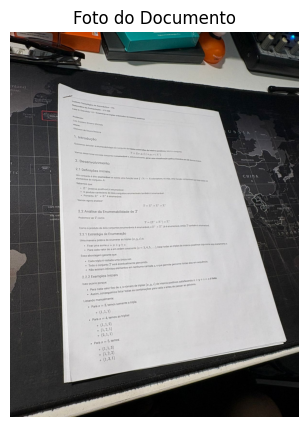

In [3]:
img = cv2.imread(doc_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
h, w, _ = img.shape

show_image(img, "Foto do Documento")

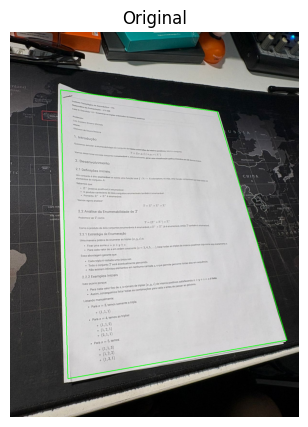

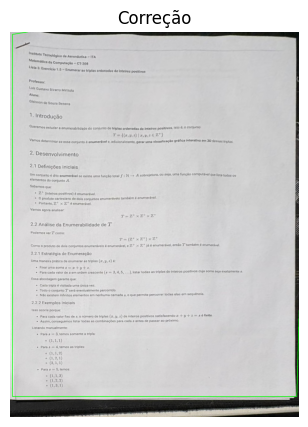

In [4]:

x1_src, y1_src = (210,240)
x2_src, y2_src = (860,330)
x3_src, y3_src = (240,1440)
x4_src, y4_src = (1150,1280)

x1_des, y1_des = (10,10)
x2_des, y2_des = (1300,-200)
x3_des, y3_des = (10,1590)
x4_des, y4_des = (1250,1590)

pts_src = np.float32([[x1_src, y1_src],[x2_src, y1_src],[x3_src, y3_src],[x4_src, y4_src]])
pts_des = np.float32([[x1_des, y1_des],[x2_des, y2_des],[x3_des, y3_des],[x4_des, y4_des]])

img_original = img.copy()
cv2.line(img_original, (x1_src, y1_src), (x2_src, y2_src), (0,255,0), 2)
cv2.line(img_original, (x2_src, y2_src), (x4_src, y4_src), (0,255,0), 2)
cv2.line(img_original, (x4_src, y4_src), (x3_src, y3_src), (0,255,0), 2)
cv2.line(img_original, (x3_src, y3_src), (x1_src, y1_src), (0,255,0), 2)
show_image(img_original, "Original")

M_persp = cv2.getPerspectiveTransform(pts_src, pts_des)

img_perspective = cv2.warpPerspective(img, M_persp, (int(w * 1.05), int(h * 1.05)))
cv2.line(img_perspective, (x1_des, y1_des), (x2_des, y2_des), (0,255,0), 2)
cv2.line(img_perspective, (x2_des, y2_des), (x4_des, y4_des), (0,255,0), 2)
cv2.line(img_perspective, (x4_des, y4_des), (x3_des, y3_des), (0,255,0), 2)
cv2.line(img_perspective, (x3_des, y3_des), (x1_des, y1_des), (0,255,0), 2)

show_image(img_perspective, "Correção")

## 3.2. Mudança de Ângulo de Câmera

(438, 1016, 3)


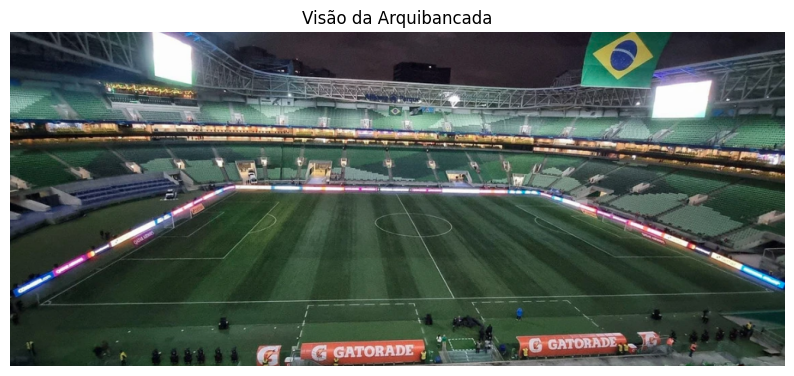

In [5]:
img = cv2.imread(estadio_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
h, w, _ = img.shape

show_image(img, "Visão da Arquibancada")

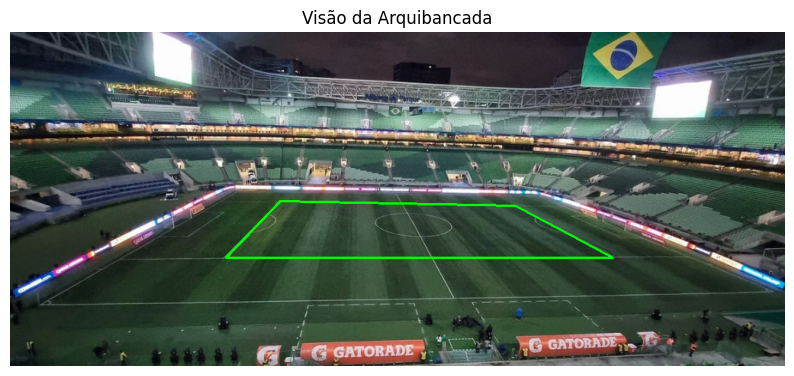

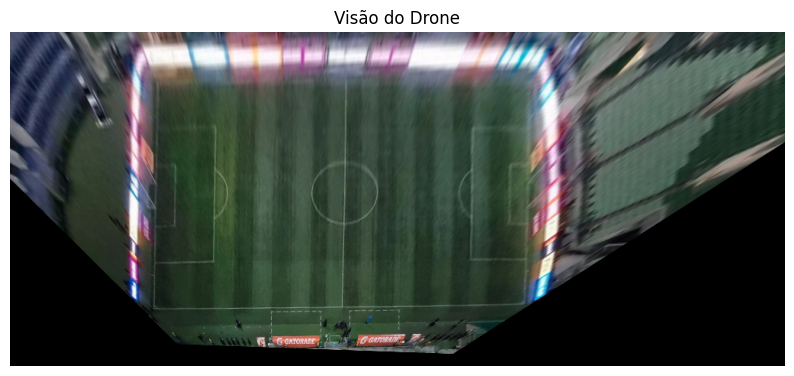

In [6]:

x1_src, y1_src = (354,222)
x2_src, y2_src = (662,228)
x3_src, y3_src = (283,296)
x4_src, y4_src = (790,296)

x1_des, y1_des = (270,120)
x2_des, y2_des = (620,100)
x3_des, y3_des = (268,300)
x4_des, y4_des = (600,300)

pts_src = np.float32([[x1_src, y1_src],[x2_src, y1_src],[x3_src, y3_src],[x4_src, y4_src]])
pts_des = np.float32([[x1_des, y1_des],[x2_des, y2_des],[x3_des, y3_des],[x4_des, y4_des]])

img_original = img.copy()
cv2.line(img_original, (x1_src, y1_src), (x2_src, y2_src), (0,255,0), 2)
cv2.line(img_original, (x2_src, y2_src), (x4_src, y4_src), (0,255,0), 2)
cv2.line(img_original, (x4_src, y4_src), (x3_src, y3_src), (0,255,0), 2)
cv2.line(img_original, (x3_src, y3_src), (x1_src, y1_src), (0,255,0), 2)
show_image(img_original, "Visão da Arquibancada")

M_persp = cv2.getPerspectiveTransform(pts_src, pts_des)

img_perspective = cv2.warpPerspective(img, M_persp, (w, h))
# cv2.line(img_perspective, (x1_des, y1_des), (x2_des, y2_des), (0,255,0), 2)
# cv2.line(img_perspective, (x2_des, y2_des), (x4_des, y4_des), (0,255,0), 2)
# cv2.line(img_perspective, (x4_des, y4_des), (x3_des, y3_des), (0,255,0), 2)
# cv2.line(img_perspective, (x3_des, y3_des), (x1_des, y1_des), (0,255,0), 2)


show_image(img_perspective, "Visão do Drone")